In [ ]:
install.packages("googledrive")
library(googledrive)
drive_auth()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=fe84416c3eb2281f866fcc5d5af02fd3&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVNWZ2kzS01wTllubTF2dWpPc2Uwc0UxZTBrSjBIb1hsSE9GTnNOLTVIWkxhSlc2ajNYcjk3dWJ5MWRSQkZlOVhfNkVrZyIsInN0YXRlIjoiZmU4NDQxNmMzZWIyMjgxZjg2NmZjYzVkNWFmMDJmZDMifQ==


In [ ]:
install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘sparsevctrs’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library(dplyr)
library(nnet)
library(caret)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
data <- read.csv('/content/loan_data_606.csv')
head(data,5)
data <- data %>% select(-id)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,⋯,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,68407277,3600,3600,3600,36,13.99,123.03,C,C4,10,⋯,3,76.9,0.0,0,0,178050,7746,2400,13734,N
2,68355089,24700,24700,24700,36,11.99,820.28,C,C1,10,⋯,2,97.4,7.7,0,0,314017,39475,79300,24667,N
3,66310712,35000,35000,35000,60,14.85,829.90,C,C5,10,⋯,1,100.0,0.0,0,0,381215,52226,62500,18000,N
4,68476807,10400,10400,10400,60,22.45,289.91,F,F1,3,⋯,4,96.6,60.0,0,0,439570,95768,20300,88097,N
5,68426831,11950,11950,11950,36,13.44,405.18,C,C3,4,⋯,0,100.0,100.0,0,0,16900,12798,9400,4000,N


In [ ]:
str(data)


'data.frame':	886812 obs. of  76 variables:
 $ loan_amnt                 : int  3600 24700 35000 10400 11950 20000 20000 10000 8000 22400 ...
 $ funded_amnt               : int  3600 24700 35000 10400 11950 20000 20000 10000 8000 22400 ...
 $ funded_amnt_inv           : num  3600 24700 35000 10400 11950 ...
 $ term                      : int  36 36 60 60 36 36 36 36 36 60 ...
 $ int_rate                  : num  14 12 14.8 22.4 13.4 ...
 $ installment               : num  123 820 830 290 405 ...
 $ grade                     : chr  "C" "C" "C" "F" ...
 $ sub_grade                 : chr  "C4" "C1" "C5" "F1" ...
 $ emp_length                : int  10 10 10 3 4 10 10 6 10 6 ...
 $ home_ownership            : chr  "MORTGAGE" "MORTGAGE" "MORTGAGE" "MORTGAGE" ...
 $ annual_inc                : num  55000 65000 110000 104433 34000 ...
 $ pymnt_plan                : chr  "n" "n" "n" "n" ...
 $ dti                       : num  5.91 16.06 17.06 25.37 10.2 ...
 $ delinq_2yrs               : int  0 

In [ ]:
#loan_data<-data%>%
  #mutate(across(where(is.character), as.factor))
loan_data<-data%>%
  mutate(across(where(is.character), as.factor))
loan_data <- data %>%
  mutate(across(c("sub_grade", "hardship_flag", "initial_list_status", "application_type", "home_ownership","pymnt_plan"),
                ~ as.numeric(as.factor(.))))
ind<-createDataPartition(loan_data$grade, p = .80, list = FALSE)
training<-loan_data[ind,]
testing<-loan_data[-ind,]

In [ ]:
pca <-prcomp(training[,-7],center = TRUE,scale.=TRUE)

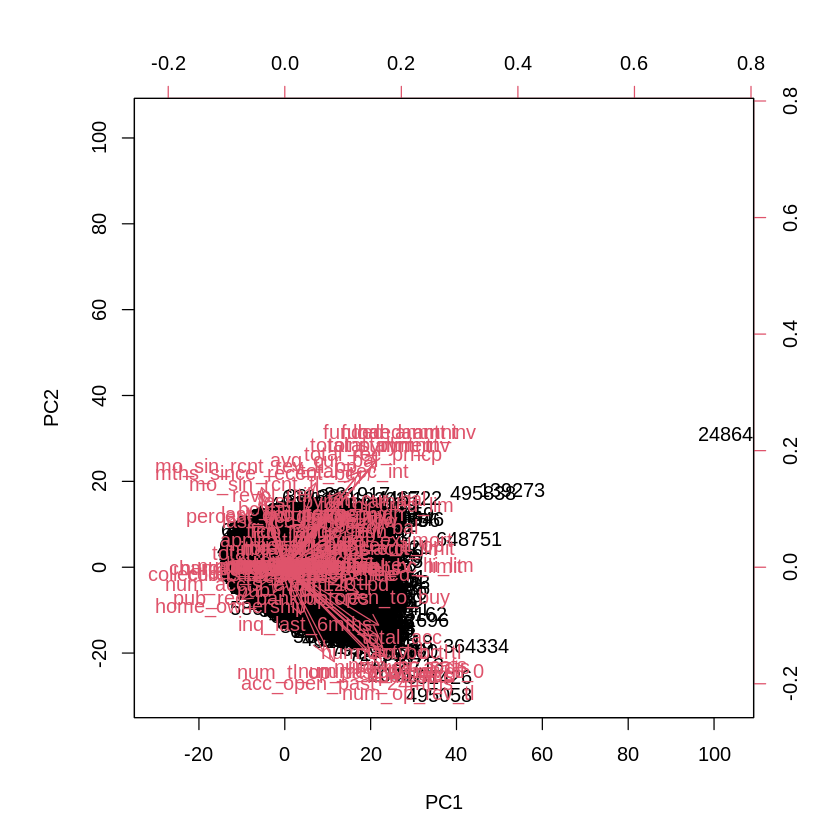

In [ ]:
biplot(pca, scale = 0)


In [ ]:
summary(pca)

Importance of components:
                         PC1     PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     3.309 2.58817 2.39352 1.93325 1.81955 1.77585 1.5779
Proportion of Variance 0.146 0.08931 0.07639 0.04983 0.04414 0.04205 0.0332
Cumulative Proportion  0.146 0.23533 0.31172 0.36155 0.40569 0.44774 0.4809
                           PC8    PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     1.52446 1.4799 1.39730 1.37951 1.35758 1.2817 1.18897
Proportion of Variance 0.03099 0.0292 0.02603 0.02537 0.02457 0.0219 0.01885
Cumulative Proportion  0.51192 0.5411 0.56716 0.59253 0.61710 0.6390 0.65786
                         PC15   PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.1092 1.0955 1.09004 1.05262 1.02951 1.01957 1.01613
Proportion of Variance 0.0164 0.0160 0.01584 0.01477 0.01413 0.01386 0.01377
Cumulative Proportion  0.6743 0.6903 0.70610 0.72088 0.73501 0.74887 0.76264
                          PC22    PC23    PC24    PC25

In [ ]:
sdev <- pca$sdev
variance_proportion <- (sdev^2) / sum(sdev^2)
cumulative_variance <- cumsum(variance_proportion)
num_components <- which(cumulative_variance >= 0.95)[1]
cat("Number of PCs to explain at least 95% variance:", num_components, "\n")

training_pred<-predict(pca,training[-7])[, 1:41]
training_pred<-data.frame(training_pred,training[7])

testing_pred<-predict(pca,testing[-7])[, 1:41]
testing_pred<-data.frame(testing_pred,testing[7])

Number of PCs to explain at least 95% variance: 41 


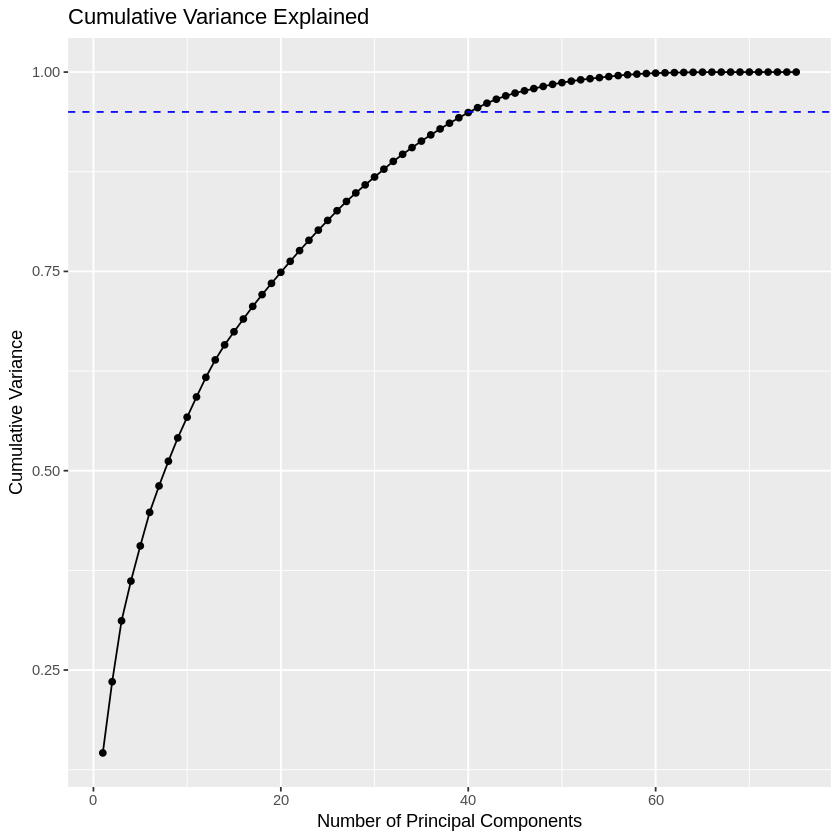

In [ ]:
library(ggplot2)
ggplot(data.frame(PC = 1:length(cumulative_variance), Variance = cumulative_variance), aes(x = PC, y = Variance)) +
  geom_line() +
  geom_point() +
  geom_hline(yintercept = 0.95, linetype = "dashed", color = "blue") +
  labs(title = "Cumulative Variance Explained", x = "Number of Principal Components", y = "Cumulative Variance")


In [ ]:
training_pred$grade <- as.factor(training_pred$grade)
training_pred$grade<-relevel(training_pred$grade,ref = "A")
dim((training_pred))

[1] 709453     42

In [ ]:
rare_classes <- c("D","E", "F", "G")

majority_data <- training_pred[!training_pred$grade %in% rare_classes, ]
minority_data <- training_pred[training_pred$grade %in% rare_classes, ]

minority_upsampled <- upSample(x = minority_data[, -which(names(minority_data) == "grade")],
                               y = minority_data$grade)

colnames(minority_upsampled)[ncol(minority_upsampled)] <- "grade"

minority_upsampled <- minority_upsampled[, names(majority_data)]

balanced_data <- rbind(majority_data, minority_upsampled)
#balanced_data


In [ ]:
table(balanced_data$grade)
train_control <- trainControl(method = "cv", number = 3)
model <- train(grade ~ ., data = balanced_data, method = "multinom", trControl = train_control)



     A      B      C      D      E      F      G 
148209 203211 204909  94012  94012  94012  94012 

# weights:  301 (252 variable)
initial  value 1209550.505901 
iter  10 value 744771.737638
iter  20 value 696466.515976
iter  30 value 693133.021626
iter  40 value 692778.504127
iter  50 value 692502.061026
iter  60 value 690073.898947
iter  70 value 669034.506295
iter  80 value 652962.187493
iter  90 value 640322.652151
iter 100 value 631031.563866
final  value 631031.563866 
stopped after 100 iterations
# weights:  301 (252 variable)
initial  value 1209550.505901 
iter  10 value 744774.652244
iter  20 value 696471.680602
iter  30 value 693138.631863
iter  40 value 692784.178825
iter  50 value 692507.687777
iter  60 value 690079.030962
iter  70 value 669048.263819
iter  80 value 653016.642188
iter  90 value 638777.188089
iter 100 value 624233.538613
final  value 624233.538613 
stopped after 100 iterations
# weights:  301 (252 variable)
initial  value 1209550.505901 
iter  10 value 744771.740553
iter  20 value 696466.521141
iter  30 value 693133.027236
iter  40 value 692778.509802
iter

In [ ]:
testing_pred$grade <- as.factor(testing_pred$grade)
testing_pred$grade<-relevel(testing_pred$grade,ref = "A")
test_pred <- predict(model,newdata=testing_pred)
conf_matrix=confusionMatrix(test_pred,testing_pred$grade)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction     A     B     C     D     E     F     G
         A 31577  3338    19     3     0     0     0
         B  5471 41012  9660    21     1     0     0
         C     4  6435 39638 12589   409     3     2
         D     0     4   377  1805   272     2     1
         E     0    10  1443  8519  7755  1152    26
         F     0     3    90   560  1642   724    90
         G     0     0     0     5   537  1234   926

Overall Statistics
                                          
               Accuracy : 0.696           
                 95% CI : (0.6938, 0.6981)
    No Information Rate : 0.2888          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6017          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity       

In [ ]:
z_values <- summary(model)$coefficients / summary(model)$standard.errors
p_values <- (1 - pnorm(abs(z_values))) * 2
print(p_values)

  (Intercept) PC1 PC2 PC3 PC4          PC5 PC6 PC7          PC8 PC9 PC10
B           0   0   0   0   0 0.000000e+00   0   0 8.681944e-14   0    0
C           0   0   0   0   0 0.000000e+00   0   0 0.000000e+00   0    0
D           0   0   0   0   0 0.000000e+00   0   0 0.000000e+00   0    0
E           0   0   0   0   0 7.685828e-07   0   0 1.230127e-13   0    0
F           0   0   0   0   0 3.443690e-12   0   0 1.110942e-07   0    0
G           0   0   0   0   0 3.305134e-05   0   0 0.000000e+00   0    0
          PC11         PC12 PC13 PC14       PC15         PC16 PC17 PC18 PC19
B 0.0000000000 0.000000e+00    0    0 0.00000000 0.000000e+00    0    0    0
C 0.0000000000 0.000000e+00    0    0 0.00000000 3.553513e-11    0    0    0
D 0.0000000000 2.666583e-09    0    0 0.03298487 0.000000e+00    0    0    0
E 0.5309507321 6.433956e-10    0    0 0.00000000 8.035722e-01    0    0    0
F 0.0000000000 0.000000e+00    0    0 0.00000000 1.776763e-02    0    0    0
G 0.0001552014 0.000000e+00

In [ ]:
table1<-table(test_pred,testing_pred$grade)
table1
#(1-sum(diag(table1))/sum(table1))*100
cat("Misclassification rate:", round((1-sum(diag(table1))/sum(table1))*100,3), "%")

         
test_pred     A     B     C     D     E     F     G
        A 31577  3338    19     3     0     0     0
        B  5471 41012  9660    21     1     0     0
        C     4  6435 39638 12589   409     3     2
        D     0     4   377  1805   272     2     1
        E     0    10  1443  8519  7755  1152    26
        F     0     3    90   560  1642   724    90
        G     0     0     0     5   537  1234   926

Misclassification rate: 30.403 %

In [ ]:
conf_matrix$byClass

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: A,0.85223470,0.9760525,0.9038269,0.9615579,0.9038269,0.85223470,0.8772729,0.208909613,0.178040021,0.19698465,0.9141436
Class: B,0.80729105,0.8802674,0.7302056,0.9192204,0.7302056,0.80729105,0.7668159,0.286435986,0.231237208,0.31667409,0.8437792
Class: C,0.77377164,0.8458599,0.6709208,0.9020198,0.6709208,0.77377164,0.7186851,0.288832255,0.223490209,0.33310968,0.8098158
Class: D,0.07680197,0.9957363,0.7334417,0.8759448,0.7334417,0.07680197,0.1390440,0.132510896,0.010177098,0.01387581,0.5362691
Class: E,0.73050113,0.9331306,0.4102089,0.9819443,0.4102089,0.73050113,0.5253887,0.059855998,0.043724874,0.10659172,0.8318159
Class: F,0.23242376,0.9863123,0.2328723,0.9862783,0.2328723,0.23242376,0.2326478,0.017563247,0.004082116,0.01752942,0.6093680
Class: G,0.88612440,0.9899271,0.3427091,0.9993187,0.3427091,0.88612440,0.4942621,0.005892004,0.005221049,0.01523464,0.9380257


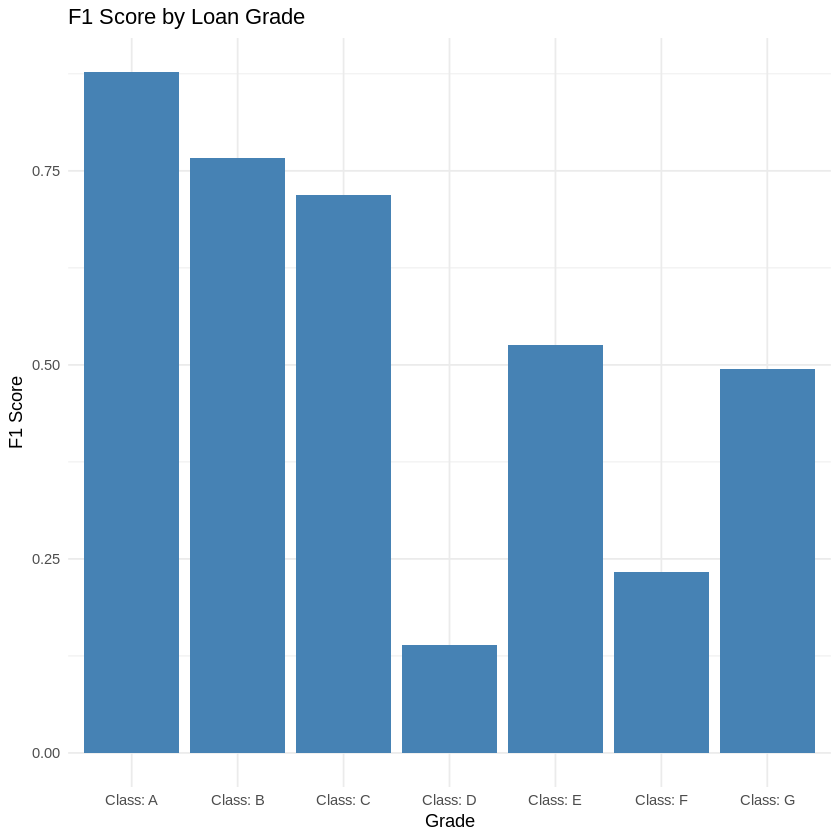

In [ ]:
library(ggplot2)
f1_scores <- as.data.frame(conf_matrix$byClass)
f1_scores$Grade <- rownames(f1_scores)

ggplot(f1_scores, aes(x = Grade, y = F1)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "F1 Score by Loan Grade", x = "Grade", y = "F1 Score") +
  theme_minimal()


multinom variable importance

     Overall
PC14 100.000
PC3   73.714
PC23  68.152
PC22  57.180
PC41  55.921
PC6   43.425
PC35  43.322
PC21  42.294
PC17  33.818
PC10  33.407
PC13  24.630
PC38  20.386
PC37  20.364
PC20  14.519
PC29   8.171
PC19   6.817
PC40   5.774
PC32   4.230
PC26   1.353
PC24   0.000


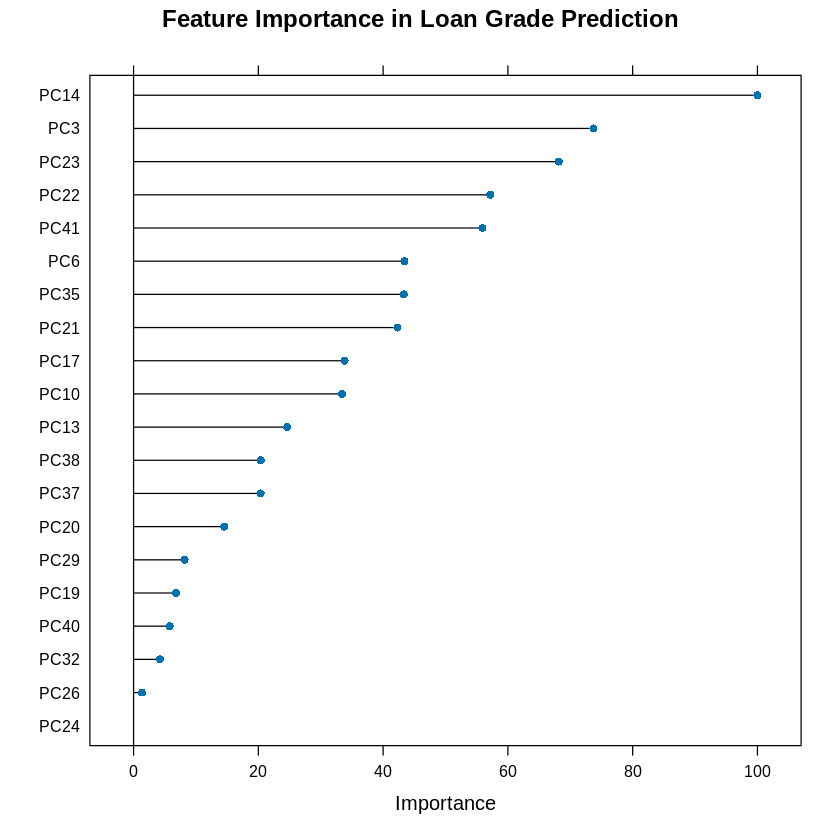

In [ ]:
importance <- varImp(model)
print(importance)
plot(importance, main = "Feature Importance in Loan Grade Prediction")


In [ ]:
library(pROC)

test_probs <- predict(model, newdata = testing_pred, type = "prob")
roc_curves <- list()
auc_values <- c()

for (class in levels(testing_pred$grade)) {
    binary_labels <- ifelse(testing_pred$grade == class, 1, 0)
    roc_curves[[class]] <- roc(binary_labels, test_probs[, class])
    auc_values[class] <- auc(roc_curves[[class]])
}
print(auc_values)



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



        A         B         C         D         E         F         G 
0.9694070 0.8400075 0.8574950 0.9024701 0.9239056 0.9639002 0.9936650 


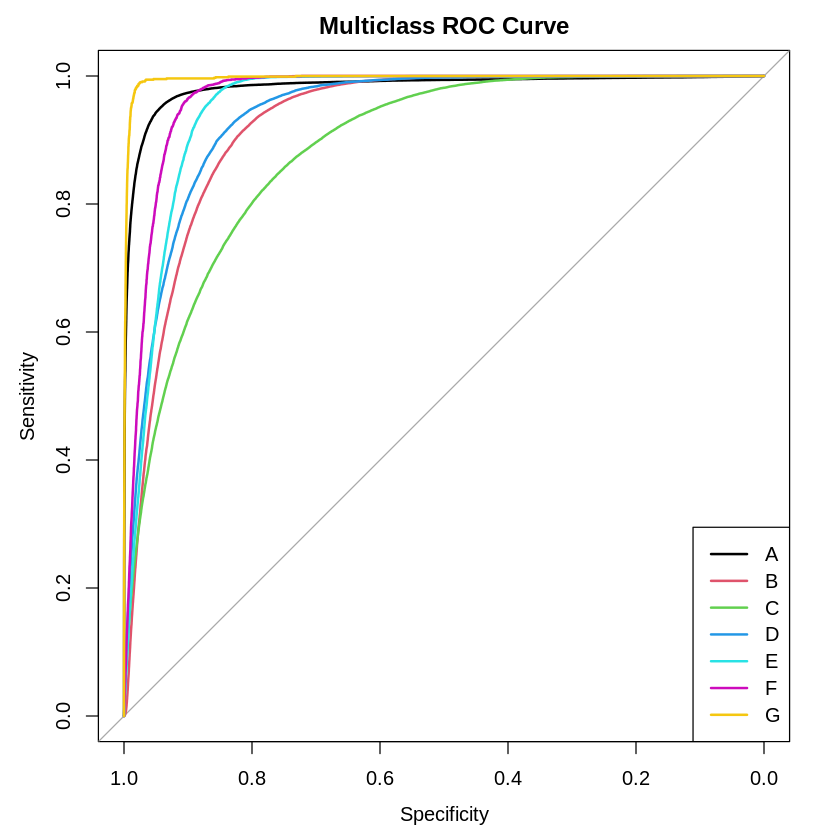

In [ ]:
plot(roc_curves[[1]], col = 1, lwd = 2, main = "Multiclass ROC Curve")
for (i in 2:length(roc_curves)) {
    plot(roc_curves[[i]], col = i, add = TRUE, lwd = 2)
}
legend("bottomright", legend = levels(testing_pred$grade), col = 1:length(roc_curves), lwd = 2)


In [ ]:
# Ensure 'loadings' is a data frame
loadings <- as.data.frame(loadings)

# If 'Feature' is stored as row names, move it to a column
loadings$Feature <- rownames(loadings)

# Order the loadings by the absolute values of PC1 in descending order
top_contributors <- loadings[order(abs(loadings$PC1), decreasing = TRUE), c("Feature", "PC23", "PC22", "PC21")]

# View the top contributors
print(top_contributors)


                                              Feature          PC23
open_acc                                     open_acc -1.733663e-02
num_sats                                     num_sats -1.667863e-02
num_op_rev_tl                           num_op_rev_tl -1.349968e-02
num_bc_sats                               num_bc_sats  9.403547e-03
total_bc_limit                         total_bc_limit  1.596482e-02
total_rev_hi_lim                     total_rev_hi_lim  1.579443e-02
num_rev_accts                           num_rev_accts -2.897716e-02
total_acc                                   total_acc -7.734519e-03
num_bc_tl                                   num_bc_tl -1.295668e-02
funded_amnt                               funded_amnt -3.111328e-03
loan_amnt                                   loan_amnt -3.111210e-03
funded_amnt_inv                       funded_amnt_inv -3.174959e-03
installment                               installment  2.551505e-03
num_rev_tl_bal_gt_0               num_rev_tl_bal

In [ ]:
important_pcs <- c("PC23", "PC22", "PC21", "PC14", "PC19", "PC3", "PC38", "PC20",
                   "PC26", "PC41", "PC6", "PC40", "PC29", "PC10", "PC17", "PC13",
                   "PC35", "PC32", "PC24", "PC37")
balanced_data_reduced <- balanced_data[, c("grade", important_pcs)]
train_control <- trainControl(method = "cv", number = 3)
model <- train(grade ~ ., data = balanced_data_reduced , method = "multinom", trControl = train_control)

# weights:  154 (126 variable)
initial  value 1209544.668171 
iter  10 value 770731.182552
iter  20 value 731923.123013
iter  30 value 730352.528325
iter  40 value 730061.337129
iter  50 value 718847.769860
iter  60 value 696619.126719
iter  70 value 684155.842272
iter  80 value 652846.479802
iter  90 value 651983.431839
iter 100 value 621776.139610
final  value 621776.139610 
stopped after 100 iterations
# weights:  154 (126 variable)
initial  value 1209544.668171 
iter  10 value 770733.707490
iter  20 value 731928.159404
iter  30 value 730357.921042
iter  40 value 730066.687936
iter  50 value 718861.208183
iter  60 value 696707.720800
iter  70 value 684101.442227
iter  80 value 652819.694027
iter  90 value 651959.434704
iter 100 value 622361.929174
final  value 622361.929174 
stopped after 100 iterations
# weights:  154 (126 variable)
initial  value 1209544.668171 
iter  10 value 770731.185077
iter  20 value 731923.128050
iter  30 value 730352.533718
iter  40 value 730061.342480
iter

In [ ]:
testing_pred$grade <- as.factor(testing_pred$grade)
testing_pred$grade<-relevel(testing_pred$grade,ref = "A")
test_pred <- predict(model,newdata=testing_pred)
conf_matrix=confusionMatrix(test_pred,testing_pred$grade)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction     A     B     C     D     E     F     G
         A 33175 12790   310    11     1     1     0
         B  3630 29592  8656    17     3     0     0
         C   203  8176 40354 16177  2886    62     2
         D    28   152  1261  4582  3233   473     9
         E     4    74   559  2437  2667   414    14
         F    11    17    68   183   680   497   171
         G     1     1    19    95  1146  1668   849

Overall Statistics
                                          
               Accuracy : 0.6299          
                 95% CI : (0.6276, 0.6321)
    No Information Rate : 0.2888          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5115          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity       